Interview Practice
===

Doing some Python interview practice.

Mostly problems from: https://book.thedatascienceinterviewproject.com/python/basics

## Problem 1

Feedback for Anne

 - How range() objects work in Python
 - Be talking much more about what you're trying to do.
 - A lot of time not thinking and also not talking.
 - Get to a runnable state as fast as possible.
 - Write a test or tests, if possible.

In [11]:
import matplotlib.pyplot as plt


def pyramid(n_rows):
    curr_value = 1
    for row_num in range(n_rows):
        values_to_print = []
        for i in range(row_num + 1):
            values_to_print.append(curr_value)
            curr_value += 1
        print(" ".join([str(value) for value in values_to_print]))


pyramid(3)
print()
pyramid(6)
print()
pyramid(0)
pyramid(1)

1
2 3
4 5 6

1
2 3
4 5 6
7 8 9 10
11 12 13 14 15
16 17 18 19 20 21

1


In [13]:
def pyramid(n_rows):
    for row_num in range(n_rows):
        curr_value = 1
        values_to_print = []
        for i in range(row_num + 1):
            values_to_print.append(curr_value)
            curr_value += 1
        print(" ".join([str(value) for value in values_to_print]))


pyramid(3)
print()
pyramid(6)
print()
pyramid(0)
pyramid(1)

1
1 2
1 2 3

1
1 2
1 2 3
1 2 3 4
1 2 3 4 5
1 2 3 4 5 6

1


In [17]:
" ".join(map(str, [1, 2, 3]))

'1 2 3'

## Problem 2

Given a string, determine whether any permutation of it is a palindrome.

For example, carerac should return true, since it can be rearranged to form racecar, which is a palindrome. sunset should return false, since there’s no rearrangement that can form a palindrome.

In [19]:
"""
Thoughts:
Many words cannot be palindromes. Need any even number of each letter, with one extra optional for odd-length words.
If a word meets the condition above, it MUST be possible to arrange it into a palindrome.
"""


def is_palindromic_permutation(word):
    counter = {}
    word_length = len(word)
    for char in word:
        if char not in counter:
            counter[char] = 0
        counter[char] += 1
    n_odd_letters = 0
    for char, count in counter.items():
        if count % 2 != 0:
            n_odd_letters += 1
    if word_length % 2 == 0:
        return n_odd_letters == 0
    else:
        return n_odd_letters <= 1


assert is_palindromic_permutation("a")
assert is_palindromic_permutation("aa")
assert not is_palindromic_permutation("ab")
assert not is_palindromic_permutation("abc")
assert is_palindromic_permutation("aba")
assert is_palindromic_permutation("abb")
assert is_palindromic_permutation("abab")
assert is_palindromic_permutation("carerac")

## Problem 3

Given a list of integers, find all combinations that equal the value N.

I opened a PR about this problem: https://github.com/dipranjan/dsinterviewqns/pull/6

In [29]:
"""
Thoughts:
Duplicate integers mean nothing, we get to reuse integers as much as we want.

Basic idea:
try all combinations. we might be able to do better, but lets start with that.

negative numbers present a very big problem, make the problem a lot harder. (we could get trapped in a loop, for example)

"all combinations" means:
a tree! branching factor equal to the number of integers
result is a list of all the nodes leading to each leaf that equals

okay, we have a working implementation.

thoughts on improvement:
we do a lot of duplicate work with this approach; we will be forced to compute every combination as many times as its length.
how to address this? well, order doesn't matter, so we should probably just bite the bullet and just track all the sets we're considering rather than the tree
the tree saves on memory, but costs us compute. actually, does it even save us memory? maybe not...
"""


def sum_combinations(integer_list, target_value):
    valid_combinations = set()
    integer_set = set(integer_list)

    class Node:
        def __init__(self, parent, value, parent_sum):
            self.parent = parent
            self.value = value
            self.sum = parent_sum + value

    leaves = [Node(None, integer, 0) for integer in integer_set]
    while len(leaves) > 0:
        new_leaves = []
        for leaf in leaves:
            if leaf.sum > target_value:
                # delete from leaves
                continue
            elif leaf.sum == target_value:
                # delete from leaves and add to valid combinations
                valid_combination = []
                curr_node = leaf
                while curr_node is not None:
                    valid_combination.append(curr_node.value)
                    curr_node = curr_node.parent
                assert sum(valid_combination) == target_value
                valid_combinations.add(tuple(sorted(valid_combination)))
                continue
            else:  # haven't yet reached the target value
                # create a new leaf for each integer
                for integer in integer_set:
                    new_leaves.append(Node(leaf, integer, leaf.sum))
        leaves = new_leaves
    return valid_combinations


integers = [2, 3, 5]
target = 8
expected_output = {(2, 2, 2, 2), (2, 3, 3), (3, 5)}
output = sum_combinations(integers, target)
assert expected_output == output

In [33]:
print(sum_combinations([1, 2, 3, 4, 5], 5))
print(
    sum_combinations(
        [
            5,
        ],
        5,
    )
)
print(sum_combinations([1, 2], 5))

{(5,), (1, 1, 3), (1, 4), (2, 3), (1, 2, 2), (1, 1, 1, 2), (1, 1, 1, 1, 1)}
{(5,)}
{(1, 2, 2), (1, 1, 1, 1, 1), (1, 1, 1, 2)}


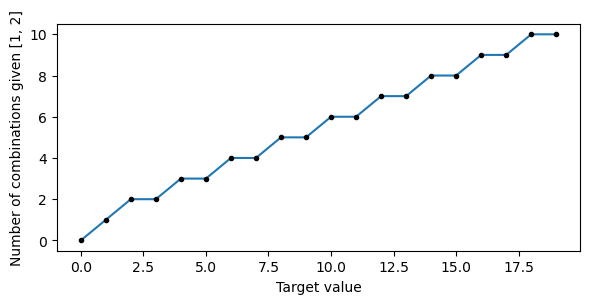

In [46]:
fig, ax = plt.subplots(1, 1, figsize=(6, 3))
xs = list(range(20))
n_combinations = [len(sum_combinations([1, 2], t)) for t in xs]
ax.plot(xs, n_combinations)
ax.scatter(xs, n_combinations, color="black", marker=".", zorder=99)
ax.set_ylabel("Number of combinations given [1, 2]")
ax.set_xlabel("Target value")
fig.tight_layout()
plt.show()

In [ ]:
# now, an implementation that supports negative integers
"""
not finishing this for now... requires additional specification.

probably need to produce a special return value if infinite combinations sum to the target.
"""


def sum_combinations(integer_list, target_value):
    valid_combinations = set()
    integer_set = set(integer_list)

    # special case: 0 is always useless
    if 0 in integer_set:
        integer_set.remove(0)

    # ... snip of above ...

In [2]:
{
    frozenset([(1, 5), (2, 0)]): 5,
    frozenset(): 0,
}

{frozenset({(1, 5), (2, 0)}): 5, frozenset(): 0}

In [22]:
def sum_combinations(integer_list, target_value):
    integer_set = frozenset(sorted(integer_list))
    assert all([integer > 0 for integer in integer_set])

    # we use a sparse sum representation to save memory
    # the total value of a combination is sum([integer * count for integer, count in combination.items()])
    # to avoid recomputing it, the value of this dict is the total value
    possible_combinations = {frozenset([(integer, 0) for integer in integer_set]): 0}
    valid_combinations = set()
    while len(possible_combinations) > 0:
        new_combinations = {}
        for candidate, total in possible_combinations.items():
            if total == target_value:
                valid_combinations.add(candidate)
            elif total < target_value:
                for integer_to_add in integer_set:
                    new_candidate = frozenset(
                        [
                            (integer, count + 1 if integer == integer_to_add else count)
                            for integer, count in candidate
                        ]
                    )
                    new_combinations[new_candidate] = total + integer_to_add
            # else: the total exceeds the target value
        possible_combinations = new_combinations

    # convert to the expected output format
    # (this can be accomplished in a one-line double list comprehension; written out for clarity)
    results = set()
    for combination in valid_combinations:
        result = []
        for integer, count in combination:
            result.extend(
                [
                    integer,
                ]
                * count
            )
        results.add(tuple(sorted(result)))
    return results


integers = [2, 3, 5]
target = 8
expected_output = {(2, 2, 2, 2), (2, 3, 3), (3, 5)}
output = sum_combinations(integers, target)
assert expected_output == output
output

{(2, 2, 2, 2), (2, 3, 3), (3, 5)}

In [17]:
%%time
print(len(sum_combinations([1, 2, 3], 200)))

3434
CPU times: user 993 ms, sys: 42.7 ms, total: 1.04 s
Wall time: 1.05 s


In [43]:
"""
We are doing too much searching; only consider combinations for "future" integers.
"""


def sum_combinations_with_replacement(integer_list, target_value):
    assert all([integer > 0 for integer in integer_list]), "Positive integers required."

    # for each combination, we need to store:
    # current index in integer_list, the current total, and the current times each term is included
    possible_combinations = [[0, 0, {}]]
    valid_combinations = set()
    while len(possible_combinations) > 0:
        new_combinations = []
        for idx, total, count_dict in possible_combinations:
            if total == target_value:
                # this is a valid combination,
                # so convert from the sparse representation of term counts to a full list
                result_list = []
                for integer, count in count_dict.items():
                    result_list.extend(
                        [
                            integer,
                        ]
                        * count
                    )
                valid_combinations.add(tuple(sorted(result_list)))
            elif total < target_value:
                # not yet at the target, generate new candidate combinations for each integer.
                # only need to consider adding integers at our current index in the integer_list and beyond
                # (since a different root combination will explore the other indices)
                for new_idx in range(idx, len(integer_list)):
                    # keep a running total to avoid redundant calls to sum()
                    new_total = total + integer_to_add
                    # copy the current formula (in a dictionary of integers -> counts)
                    # and add 1 to the count of whichever integer we're adding for this candidate
                    new_count_dict = count_dict.copy()
                    integer_to_add = integer_list[new_idx]
                    if integer_to_add not in new_count_dict:
                        new_count_dict[integer_to_add] = 0
                    new_count_dict[integer_list[new_idx]] += 1
                    combination = (new_idx, new_total, new_count_dict)
                    new_combinations.append(combination)
            # else: the total exceeds the target value
        possible_combinations = new_combinations
    return valid_combinations


integers = [2, 3, 5]
target = 8
expected_output = {(2, 2, 2, 2), (2, 3, 3), (3, 5)}
output = sum_combinations(integers, target)
assert expected_output == output
output

{(2, 2, 2, 2), (2, 3, 3), (3, 5)}

In [40]:
%%time
print(len(sum_combinations([1, 2, 3], 200)))

3434
CPU times: user 215 ms, sys: 3.28 ms, total: 218 ms
Wall time: 220 ms


In [13]:
# the book solution:
def a(lst, target):
    final_list = []  # list to store all the valid results

    def _a(idx, li):
        if target == sum(li):
            final_list.append(li)
        elif target < sum(li):
            return

        for u in range(idx, len(lst)):
            _a(u, li + [lst[u]])  # recursive call
        return final_list

    return _a(0, [])  # initial call


a([2, 3, 5], 8)

[[2, 2, 2, 2], [2, 3, 3], [3, 5]]

In [42]:
%%time
print(len(a([1, 2, 3], 200)))

3434
CPU times: user 479 ms, sys: 5.28 ms, total: 484 ms
Wall time: 488 ms


In [49]:
# runs forever (i.e. recursion error):
# a([1,-2],5)

## Problem 4

Given a list of stock prices in ascending order by datetime, write a function that outputs the max profit by buying and selling at a specific interval.

In [1]:
def get_max_profits(stock_price_list):
    """
    Notes:
    This is a bad implementation that doesn't exploit any structure about the problem.
    The book's solution doesn't actually seem any better to me.
    """
    buy_sell_map = {}  # map of time -> (buy_price, sell_price)
    for time, price in enumerate(stock_price_list):
        for prev_time in buy_sell_map.keys():
            buy_price, sell_price = buy_sell_map[prev_time]
            if price > sell_price and price > buy_price:
                buy_sell_map[prev_time] = (buy_price, price)
        buy_sell_map[time] = (price, price)
    best_profit = 0
    best_buy_price, best_sell_price = 0, 0
    for buy_price, sell_price in buy_sell_map.values():
        profit = sell_price - buy_price
        if profit > best_profit:
            best_profit = profit
            best_buy_price, best_sell_price = buy_price, sell_price

    return best_buy_price, best_sell_price


stock_prices = [10, 5, 20, 32, 25, 12]
expected_buy_price, expected_sell_price = 5, 32
buy_price, sell_price = get_max_profits(stock_prices)
assert expected_buy_price == buy_price and expected_sell_price == sell_price

In [3]:
get_max_profits([100, 110, 0, 0, 100, 105])

(0, 105)